## Test fonction run exp

### 1. Imports

In [1]:
import torch
import math
import config as config_
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
import stat_reliability_measure.dev.torch_utils as t_u
from dev.amls.amls_config import MLS_SMC_Config
import stat_reliability_measure.dev.utils as utils
import stat_reliability_measure.run_exp as run_exp
from config import Exp2Config
import stat_reliability_measure.dev.smc.smc_pyt as smc_pyt
import stat_reliability_measure.dev.amls.amls_pyt as amls_pyt
import dev.amls.amls_config as amls_config 
import stat_reliability_measure.dev.mls.webb_config as webb_config
import stat_reliability_measure.dev.mls.amls_uniform as amls_webb
from dev.utils import range_vars,simple_vars
import os 

### 2. Model & Data load

In [3]:
reload(config_)

<module 'config' from '/home/karim-tito/stat_reliability_measure/config.py'>

In [4]:
config = Exp2Config(method_name="amls_webb")

In [5]:
config.update()
os.rmdir(config.exp_log_path)

input_shape:(1, 28, 28)


In [6]:
model=config.model

In [7]:
X,y = config.X[:1], config.y[:1]

In [8]:
config.sample_accuracy

0.9921875

## 3. Experiments with MALA-SMC, ours implementation and Webb's implementation of AMLS algorithm

In [34]:
epsilon_range=[0.18]
dataset='mnist'
n_rep = 100 
method_ref='MALA_SMC'
N_ref = 4000
T_ref = 50
ess_ref = 0.9
alpha_ref = 0.2

In [ ]:
results_df, exp_config,method_config,agg_res_df = run_exp.run_stat_rel_exp(model=model,X=X,y=y, 
                                             method='mala', dataset_name=dataset,n_rep=100,
                                epsilon_range=epsilon_range, update_aggr_res=True ,track_accept=False,
                                N_range=[N_ref], T_range =[T_ref],ess_alpha = ess_ref,alpha=alpha_ref)
p_ref = results_df['mean_est'].values[0]

In [96]:
ref_exp = utils.get_sel_df(df=agg_res_df, triplets=[('method_name',method_ref,'='),
        ('N',N_ref,'='),('T',T_ref,'='),('alpha',alpha_ref,'=') ])

In [97]:
p_ref =ref_exp['mean_est'].values[0]

In [98]:
p_ref

1.417912914689623e-06

In [63]:
reload(amls_config)
reload(config_)
reload(webb_config)
reload(amls_webb)
reload(amls_pyt)
reload(smc_pyt)
reload(run_exp)

<module 'stat_reliability_measure.run_exp' from '/home/karim-tito/stat_reliability_measure/run_exp.py'>

In [100]:
results_df, exp_config, method_config2, agg_res_df=run_exp.run_stat_rel_exp(model=model,method='amls_webb',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=100, update_aggr_res=False, 
                         N_range=[500],T_range=[10,20,50,100,200],ratio_range=[0.1,],repeat_exp=False,
                        verbose=1,np_seed=0, torch_seed=0 ,p_ref=p_ref
 )

[[500], [10, 20, 50, 100, 200], [0.1]]
Running reliability experiments on architecture custom trained on mnist.
Testing uniform noise pertubation with epsilon in [0.18]
{'N_range': [500], 'T_range': [10, 20, 50, 100, 200], 'ratio_range': [0.1]}
Starting MLS_Webb simulation 1/5, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 10: ratio: 0.1


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:45<00:00,  2.19it/s]


mean est:2.3834669536285416e-08, std est:1.6688917472871354e-07
mean calls:72160.0
std. re.:293771659.9923464
std. rel. adj.:21198562985047.715
mean rel. error:0.983190314941519
std rel. error:0.11770058160817659
stat performance (per 1k calls):8.493273968846022
Starting MLS_Webb simulation 2/5, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 20: ratio: 0.1


100%|██████████| 100/100 [01:11<00:00,  1.40it/s]


mean est:4.119323941728914e-07, std est:2.9993057176210154e-06
mean calls:117285.0
std. re.:17675383.418448802
std. rel. adj.:2073057344232.7678
mean rel. error:1.246102154914117
std rel. error:1.8506941190540132
stat performance (per 1k calls):217.0586597532499
Starting MLS_Webb simulation 3/5, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 50: ratio: 0.1


100%|██████████| 100/100 [02:34<00:00,  1.55s/it]


mean est:7.200586775854336e-08, std est:5.541428690256756e-07
mean calls:235875.0
std. re.:106877422.54916862
std. rel. adj.:25209712043785.15
mean rel. error:1.0073600652056454
std rel. error:0.19742254496666542
stat performance (per 1k calls):46.5670427940122
Starting MLS_Webb simulation 4/5, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 100: ratio: 0.1


100%|██████████| 100/100 [04:04<00:00,  2.44s/it]


mean est:7.302088221260254e-08, std est:1.5162254088968027e-07
mean calls:411575.0
std. re.:28436072.903760377
std. rel. adj.:11703576705365.178
mean rel. error:0.948501151617914
std rel. error:0.10693360594918482
stat performance (per 1k calls):44.011198868535736
Starting MLS_Webb simulation 5/5, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 200: ratio: 0.1


100%|██████████| 100/100 [07:37<00:00,  4.57s/it]


mean est:3.840419256527509e-07, std est:1.6240687825256416e-06
mean calls:753750.0
std. re.:11011516.685865363
std. rel. adj.:8299930701971.018
mean rel. error:0.9687746438046024
std rel. error:0.9513476472783905
stat performance (per 1k calls):717.0782891360868


In [101]:
results_df, exp_config, method_config2, agg_res_df=run_exp.run_stat_rel_exp(model=model,method='amls_batch',X=X,y=y,dataset_name=dataset,
                        epsilon_range=epsilon_range, n_rep=100, update_aggr_res=False, 
                         N_range=[500],T_range=[20,50,100,200],ratio_range=[0.1,],repeat_exp=False,
                        verbose=1,np_seed=0, torch_seed=0,p_ref=p_ref )

[[500], [20, 50, 100, 200], [0.1], [1.0]]
Running reliability experiments on architecture custom trained on mnist.
Testing uniform noise pertubation with epsilon in [0.18]
{'N_range': [500], 'T_range': [20, 50, 100, 200], 'ratio_range': [0.1], 's_range': [1.0]}
Starting MLS_SMC simulation 1/4, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 20: ratio: 0.1: s: 1.0


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:21<00:00,  4.68it/s]


mean est:2.0940600000000007e-07, std est:8.427838372916276e-08
mean calls:54950.0
std. re.:1921931.7262933285
std. rel. adj.:105610148359.8184
mean rel. error:0.8523139201071185
std rel. error:0.05943833563827229
stat performance (per 1k calls):3.2661365433230625
Starting MLS_SMC simulation 2/4, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 50: ratio: 0.1: s: 1.0


100%|██████████| 100/100 [00:51<00:00,  1.96it/s]


mean est:1.8827000000000008e-07, std est:5.938265992695176e-08
mean calls:135950.0
std. re.:1675318.56765617
std. rel. adj.:227759559272.85632
mean rel. error:0.8672203362776959
std rel. error:0.04188032939946136
stat performance (per 1k calls):5.693630781856771
Starting MLS_SMC simulation 3/4, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 100: ratio: 0.1: s: 1.0


100%|██████████| 100/100 [01:45<00:00,  1.05s/it]


mean est:2.0255200000000005e-07, std est:6.583164053857388e-08
mean calls:271850.0
std. re.:1604580.8560148645
std. rel. adj.:436205305707.6409
mean rel. error:0.8571477853812073
std rel. error:0.04642854991766842
stat performance (per 1k calls):12.621601295118161
Starting MLS_SMC simulation 4/4, with model: mnist_model, img_idx:0,eps:0.18,N: 500: T: 200: ratio: 0.1: s: 1.0


100%|██████████| 100/100 [03:15<00:00,  1.95s/it]


mean est:1.9278600000000004e-07, std est:6.179152210457356e-08
mean calls:544100.0
std. re.:1662562.2233017685
std. rel. adj.:904600105698.4923
mean rel. error:0.8640353733979492
std rel. error:0.04357920819001747
stat performance (per 1k calls):23.711447176188507


In [102]:
results_df, exp_config, method_config, agg_res_df=run_exp.run_stat_rel_exp(model=model,method='mala',X=X,y=y,dataset_name='mnist',
                        n_rep=100, verbose=0, track_accept=False,ess_alpha_range=[0.8],
                         N_range=[1000],T_range=[2,5,10,20],epsilon_range=epsilon_range,repeat_exp=False,p_ref=p_ref
 )

[[1000], [2, 5, 10, 20], [0.8], [0.25], [1]]
{'N_range': [1000], 'T_range': [2, 5, 10, 20], 'ess_alpha_range': [0.8], 'alpha_range': [0.25], 'L_range': [1]}
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 1/4, with model: mnist_model, img_idx:0,eps:0.18,N: 1000: T: 2: ess_alpha: 0.8: alpha: 0.25: L: 1


100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


mean est:3.3199127877026056e-07, std est:6.56873241568717e-07
mean calls:122990.52
std. re.:5959752.444343065
std. rel. adj.:732993052201.0247
mean rel. error:0.8591946936088233
std rel. error:0.250881904803773
stat performance (per 1k calls):30.85609593040654
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 2/4, with model: mnist_model, img_idx:0,eps:0.18,N: 1000: T: 5: ess_alpha: 0.8: alpha: 0.25: L: 1


100%|██████████| 100/100 [01:39<00:00,  1.01it/s]


mean est:4.393163633409358e-07, std est:6.993738028431576e-07
mean calls:297453.0
std. re.:3623719.731391109
std. rel. adj.:1077886305261.4796
mean rel. error:0.7932847952292457
std rel. error:0.30052781445775384
stat performance (per 1k calls):89.39289999390225
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 3/4, with model: mnist_model, img_idx:0,eps:0.18,N: 1000: T: 10: ess_alpha: 0.8: alpha: 0.25: L: 1


100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


mean est:4.0453759979186545e-07, std est:2.9988842967001697e-07
mean calls:586885.8
std. re.:1832491.3079786676
std. rel. adj.:1075463127276.1068
mean rel. error:0.7297418585021004
std rel. error:0.15165095576847884
stat performance (per 1k calls):89.00179249694833
Experiment already done for method: MALA_SMC
Starting MALA_SMC simulation 4/4, with model: mnist_model, img_idx:0,eps:0.18,N: 1000: T: 20: ess_alpha: 0.8: alpha: 0.25: L: 1


100%|██████████| 100/100 [04:20<00:00,  2.61s/it]


mean est:5.863126955318876e-07, std est:2.924567140079057e-07
mean calls:1137793.8
std. re.:850752.0411605528
std. rel. adj.:967980397769.8218
mean rel. error:0.6014770857528089
std rel. error:0.1573068660990283
stat performance (per 1k calls):178.9827769449046


In [67]:
results_df['verbose']

0    0
1    0
Name: verbose, dtype: int64

In [18]:
results_df = utils.get_sel_df(results_df,triplets=[('method_name','MLS_Webb','=')])

## 4. Analysis of Experiments

In [22]:
eps=0.18

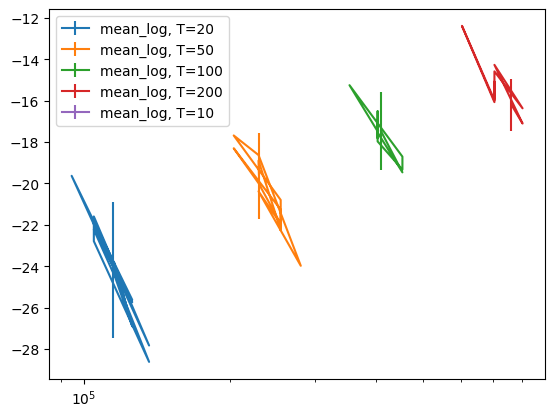

In [26]:
fig=plt.figure()
ax=plt.axes()
ax.set_xscale('log')
mls_webb_df=  utils.get_sel_df(df=agg_res_df,triplets=[('method_name','MLS_Webb','=')])
for T in agg_res_df['T'].unique():
    df = utils.get_sel_df(mls_webb_df,triplets=[('T',T,'='),('epsilon',eps,'=')])
    ax.errorbar(x=df['mean_calls'],y=df['mean_log_est'], yerr=df['std_log_est'],label=f'mean_log, T={T}',)
    ax.legend()

